In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

Using cache found in C:\Users\lexus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-4 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
#loading the weights from fruits file
model_fruit = torch.hub.load("ultralytics/yolov5", "custom", "C:/Users/lexus/Desktop/DeepLearning/YOLO/fruits_detection/best_fruits_weight.pt")

Using cache found in C:\Users\lexus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-4 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
#now we can test our images using the model
fruit1 = cv2.imread("C:/Users/lexus/Desktop/DeepLearning/YOLO/fruits_detection/yolov5s/data/images/val/mixed_21.jpg")


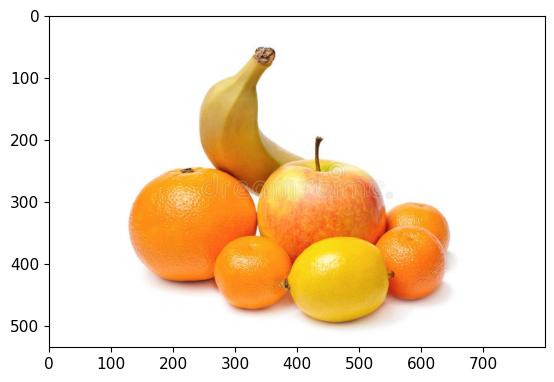

In [5]:
%matplotlib inline
fruit2 = cv2.cvtColor(fruit1,cv2.COLOR_BGR2RGB)
plt.imshow(fruit2)

In [6]:
result1 = model_fruit(fruit2)
result1.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,524.946350,299.773071,649.951599,468.844513,0.713192,1,orange
1,119.956223,244.245834,343.502869,433.408569,0.643779,1,orange
2,338.990387,230.532410,548.028931,394.294159,0.501691,1,orange
3,347.057617,299.509888,640.688171,494.185181,0.397333,1,orange
4,261.562408,345.939819,391.189911,481.066162,0.358153,1,orange
5,384.561035,351.730194,547.484436,494.182434,0.316033,1,orange


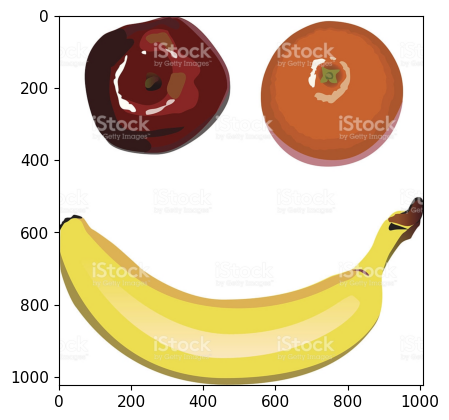

In [7]:
fruit3 = cv2.imread("C:/Users/lexus/Desktop/DeepLearning/YOLO/fruits_detection/yolov5s/data/images/val/mixed_22.jpg")
%matplotlib inline
fruit3 = cv2.cvtColor(fruit3,cv2.COLOR_BGR2RGB)
plt.imshow(fruit3)

In [8]:
result2 = model_fruit(fruit3)
result2.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,546.190613,15.592188,958.455872,417.449860,0.897793,1,orange
1,0.000000,491.579193,972.820496,1022.569153,0.856567,2,banana
2,75.667160,0.000000,485.776550,389.975281,0.820385,0,apple


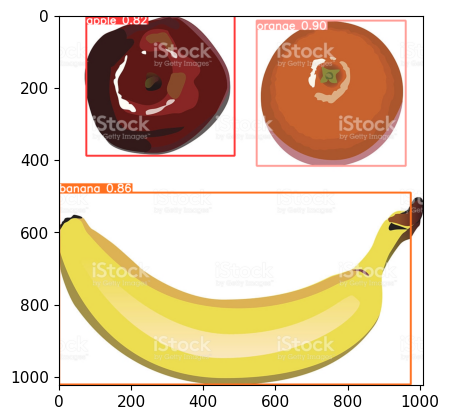

In [9]:
plt.imshow(np.squeeze(result2.render()))

In [10]:
#loading custom trained weights from license detection model
model_license = torch.hub.load("ultralytics/yolov5", "custom", "C:/Users/lexus/Desktop/DeepLearning/YOLO/licence_plate_detection_training_dataset/best_car_weights.pt")

Using cache found in C:\Users\lexus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-4 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


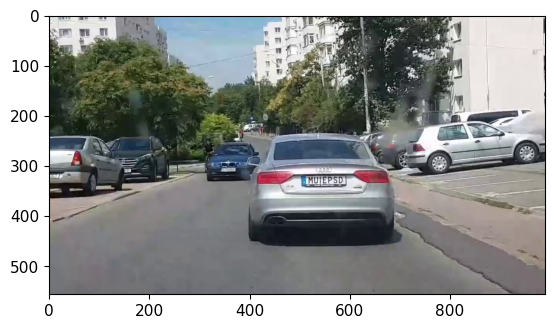

In [11]:
#load the image fo license plate detection
%matplotlib inline
car_img2 = cv2.imread("C:/Users/lexus/Desktop/DeepLearning/YOLO/licence_plate_detection_training_dataset/test1.jpg")
car_img = cv2.cvtColor(car_img2,cv2.COLOR_BGR2RGB)
plt.imshow(car_img)

In [12]:
model_license.conf=0.6 #setting confidence leve to 0.6
result3 = model_license(car_img)

result3.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,503.418365,315.150421,590.812439,340.336945,0.840215,0,license


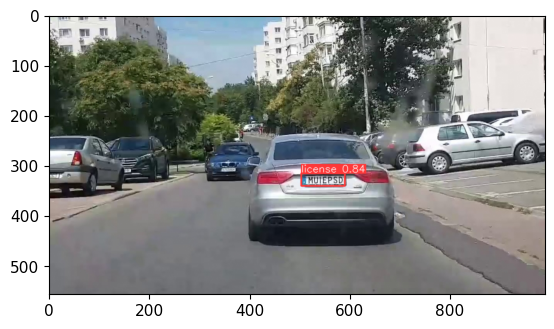

In [13]:
plt.imshow(np.squeeze(result3.render()))

In [14]:
#now displaying only the license plate
car_xyxy = result3.pandas().xyxy[0]
int(car_xyxy["ymin"][0])

315

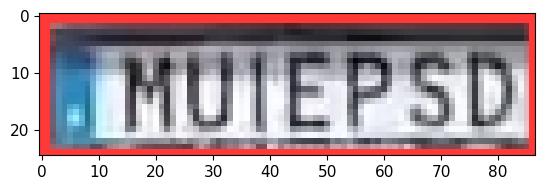

In [15]:
plt.imshow(car_img[int(car_xyxy["ymin"]):int(car_xyxy["ymax"]), int(car_xyxy["xmin"]):int(car_xyxy["xmax"][0])])

In [16]:
#now reading the characters
! pip install easyocr

  Using cached opencv_python_headless-4.5.4.60-cp38-cp38-win_amd64.whl (35.0 MB)


In [17]:
from easyocr import Reader
img2txt = Reader(["en"])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
plate1 = car_img[int(car_xyxy["ymin"]):int(car_xyxy["ymax"]), int(car_xyxy["xmin"]):int(car_xyxy["xmax"][0])]
label1 = img2txt.readtext(plate1)
print(label1)

[([[6, 2], [87, 2], [87, 25], [6, 25]], 'MUEPSD', 0.13957542184716054)]


In [19]:
label1[0][1]

'MUEPSD'

'MUEPSD'

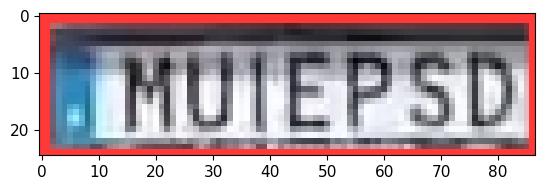

In [20]:
plt.imshow(car_img[int(car_xyxy["ymin"]):int(car_xyxy["ymax"]), int(car_xyxy["xmin"]):int(car_xyxy["xmax"][0])])
label1[0][1]

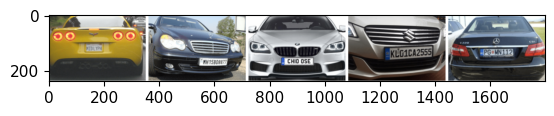

In [22]:
#doing for multiple number plates
%matplotlib inline
car_img3 = cv2.imread("C:/Users/lexus/Desktop/DeepLearning/YOLO/car_img4.png")
car_img2 = cv2.cvtColor(car_img3,cv2.COLOR_BGR2RGB)
plt.imshow(car_img2)

In [23]:
result4 = model_license(car_img2)
xyxy = result4.pandas().xyxy[0]
xyxy

,xmin,ymin,xmax,ymax,confidence,class,name
0,541.106201,150.811218,650.575623,187.018784,0.888741,0,license
1,840.762756,150.555954,964.670654,181.546509,0.858945,0,license
2,1563.277954,121.064095,1687.008667,147.780975,0.784842,0,license
3,1223.436401,117.949257,1390.179810,152.888199,0.778412,0,license
4,123.098671,95.820282,204.249756,140.404007,0.750409,0,license


HK15BD8877


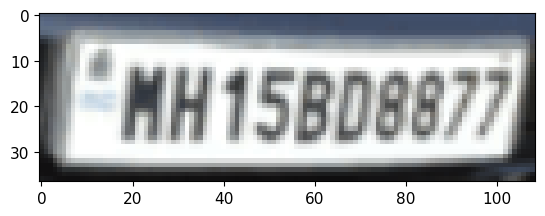

chio OSE


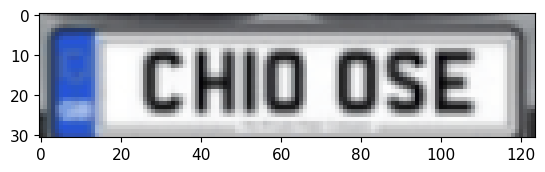

PGeHN12


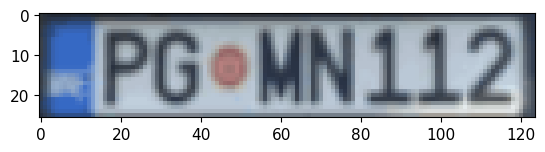

KLg1CA2555


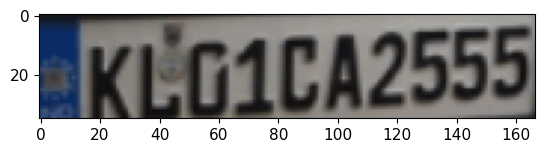

HIDLYPH


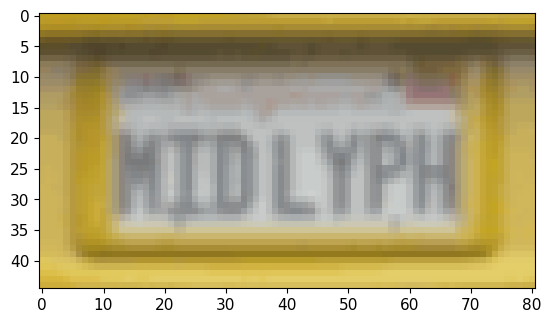

In [24]:
%matplotlib inline
for i in range(len(xyxy)):
    labels = car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])]
    plt.imshow(car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])])
    answer = img2txt.readtext(labels)
    print(answer[0][1])
    
    plt.show()

In [25]:
model2 = torch.hub.load("ultralytics/yolov5", "custom", "C:/Users/lexus/Desktop/DeepLearning/YOLO/licence_plate_detection_training_dataset/best_ch_19_10.pt")

Using cache found in C:\Users\lexus/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-4 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7109914 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


         xmin       ymin        xmax       ymax  confidence  class name
3   17.681305  10.899824   27.739908  28.551857    0.951992     32    M
4   28.377798  10.986081   38.115128  28.762205    0.951324     10    H
5   38.522430  11.051702   46.376652  28.520267    0.949388      0    1
10  38.522488  11.091668   46.563145  28.380724    0.608096     23    5
0   47.108528  11.414178   56.211422  28.470226    0.961053     23    5
1   56.612961  11.865226   64.772255  28.357496    0.956245     31    B
6   66.024551  12.320972   72.125694  28.307175    0.949132      7    D
7   73.695000  12.598350   81.430550  27.531765    0.948935      9    8
2   82.214745  12.426487   89.084747  27.351772    0.954921      9    8
11  82.335899  12.301100   95.254951  27.336525    0.297788     19    7
8   89.616837  11.705804   96.600090  27.876009    0.936261     19    7
9   97.352379  11.383048  104.216316  27.343189    0.923974     19    7


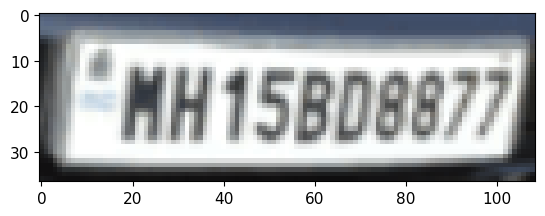

        xmin      ymin        xmax       ymax  confidence  class name
5  24.840189  8.801178   36.154396  25.404518    0.956135      1    C
1  38.026352  8.791989   49.407604  25.550064    0.962729     10    H
6  49.843689  8.682157   55.216812  25.491081    0.935604      0    1
0  55.681736  8.616343   66.939880  25.185555    0.963814     16    0
2  73.573898  8.536285   84.871506  25.115013    0.962260     16    0
3  85.541466  8.498078   96.936356  25.314152    0.961063     22    S
4  97.731087  8.223241  109.190506  25.237579    0.958293      3    E


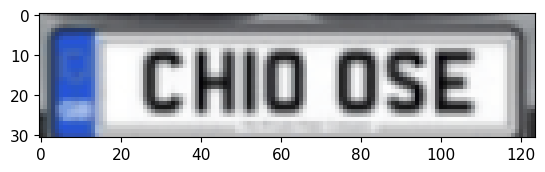

         xmin      ymin        xmax       ymax  confidence  class name
1   15.014383  3.517117   27.828169  23.649645    0.965012     28    P
3   28.009907  3.961565   40.829018  22.874498    0.957618     21    G
6   54.052456  3.375301   65.992569  22.854364    0.952773     32    M
0   66.534653  3.139675   79.788261  22.998194    0.972196     11    N
5   80.805000  2.617263   93.450211  22.974695    0.955611      0    1
4   94.292717  2.587857  105.985878  23.028027    0.957274      0    1
2  106.509811  3.079215  119.204292  22.723083    0.961797      8    2


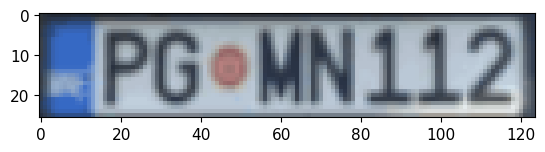

          xmin      ymin        xmax       ymax  confidence  class name
4    15.500039  9.809677   31.839312  34.828423    0.965141     26    K
9    32.579372  9.328265   48.282654  34.308933    0.950310     17    L
8    49.621311  8.440192   64.670815  34.339653    0.952047     16    0
10   49.754005  8.513576   64.641136  34.083290    0.638955     21    G
7    64.690445  7.459287   80.019897  34.436329    0.957447      0    1
11   64.841858  7.221593   80.182686  34.468994    0.302856      1    C
5    80.529068  6.686305   94.628944  33.278595    0.963490      1    C
6    95.541412  5.927347  109.625809  33.063984    0.957635     14    A
1   110.275780  5.438424  124.127640  31.366590    0.979573      8    2
3   124.863327  4.789460  138.544067  30.257511    0.967659     23    5
0   138.676376  4.177064  152.125839  29.628021    0.980385     23    5
2   152.085419  3.808939  166.022537  28.710329    0.978170     23    5


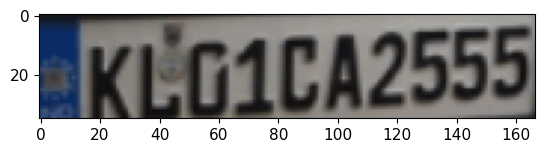

        xmin       ymin       xmax       ymax  confidence  class name
5  11.943835  18.828102  20.464596  33.266670    0.926847     32    M
6  19.979359  18.855457  26.654242  33.390530    0.800512     34    I
1  27.226006  19.042425  35.595951  32.921574    0.955769      7    D
0  36.967808  18.696428  45.030457  33.129761    0.959469     17    L
3  45.309887  18.325218  52.422455  33.188530    0.941670     30    Y
2  53.004185  18.424446  60.501606  33.132210    0.948775     28    P
4  60.910130  18.211737  68.052193  33.246517    0.937549     10    H


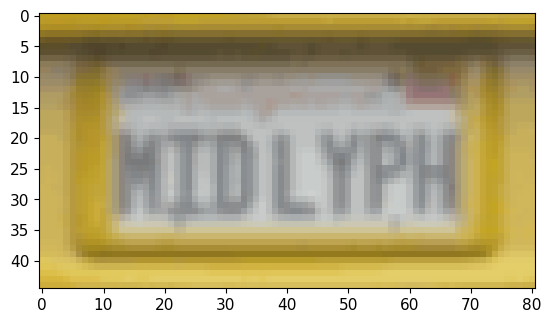

In [26]:
%matplotlib inline
for i in range(len(xyxy)):
    labels = car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])]
    plt.imshow(car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])])
    model_ocr = model2(labels)
    char_model = model_ocr.pandas().xyxy[0]#here the order is not proper, hence we sort it using xmin values
    print(char_model.sort_values("xmin"))
    plt.show()

In [28]:
! pip install transformers

In [34]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [35]:
printed_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
printed_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
def ocr_printed_image(src_img,printed_processor,printed_model):
  pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [37]:
result = ocr_printed_image(plate1,printed_processor,printed_model)
result

'.MUTEPSD'

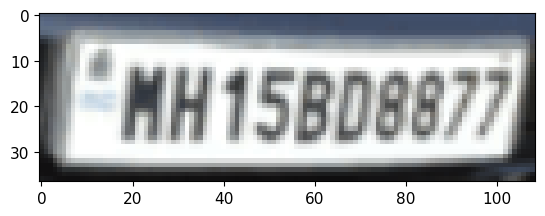

Easy OCR result is: [([[14, 6], [108, 6], [108, 32], [14, 32]], 'HK15BD8877', 0.2995955280421262)]
YOLO Model result is :          xmin       ymin        xmax       ymax  confidence  class name
3   17.681305  10.899824   27.739908  28.551857    0.951992     32    M
4   28.377798  10.986081   38.115128  28.762205    0.951324     10    H
5   38.522430  11.051702   46.376652  28.520267    0.949388      0    1
10  38.522488  11.091668   46.563145  28.380724    0.608096     23    5
0   47.108528  11.414178   56.211422  28.470226    0.961053     23    5
1   56.612961  11.865226   64.772255  28.357496    0.956245     31    B
6   66.024551  12.320972   72.125694  28.307175    0.949132      7    D
7   73.695000  12.598350   81.430550  27.531765    0.948935      9    8
2   82.214745  12.426487   89.084747  27.351772    0.954921      9    8
11  82.335899  12.301100   95.254951  27.336525    0.297788     19    7
8   89.616837  11.705804   96.600090  27.876009    0.936261     19    7
9   97.352379 

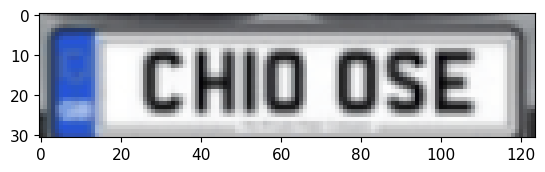

Easy OCR result is: [([[20, 4], [112, 4], [112, 30], [20, 30]], 'chio OSE', 0.555473858314115)]
YOLO Model result is :         xmin      ymin        xmax       ymax  confidence  class name
5  24.840189  8.801178   36.154396  25.404518    0.956135      1    C
1  38.026352  8.791989   49.407604  25.550064    0.962729     10    H
6  49.843689  8.682157   55.216812  25.491081    0.935604      0    1
0  55.681736  8.616343   66.939880  25.185555    0.963814     16    0
2  73.573898  8.536285   84.871506  25.115013    0.962260     16    0
3  85.541466  8.498078   96.936356  25.314152    0.961063     22    S
4  97.731087  8.223241  109.190506  25.237579    0.958293      3    E
Trained OCR result is : CHIO OSE


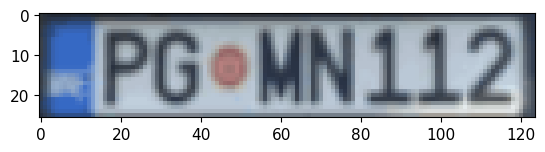

Easy OCR result is: [([[12, 0], [124, 0], [124, 26], [12, 26]], 'PGeHN12', 0.28588505630326805)]
YOLO Model result is :          xmin      ymin        xmax       ymax  confidence  class name
1   15.014383  3.517117   27.828169  23.649645    0.965012     28    P
3   28.009907  3.961565   40.829018  22.874498    0.957618     21    G
6   54.052456  3.375301   65.992569  22.854364    0.952773     32    M
0   66.534653  3.139675   79.788261  22.998194    0.972196     11    N
5   80.805000  2.617263   93.450211  22.974695    0.955611      0    1
4   94.292717  2.587857  105.985878  23.028027    0.957274      0    1
2  106.509811  3.079215  119.204292  22.723083    0.961797      8    2
Trained OCR result is : -PG.MN112


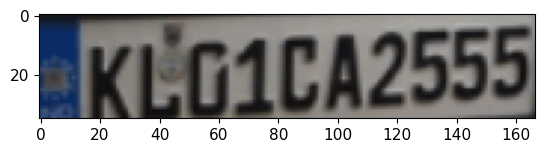

Easy OCR result is: [([[10, 0], [167, 0], [167, 35], [10, 35]], 'KLg1CA2555', 0.6397716545544576)]
YOLO Model result is :           xmin      ymin        xmax       ymax  confidence  class name
4    15.500039  9.809677   31.839312  34.828423    0.965141     26    K
9    32.579372  9.328265   48.282654  34.308933    0.950310     17    L
8    49.621311  8.440192   64.670815  34.339653    0.952047     16    0
10   49.754005  8.513576   64.641136  34.083290    0.638955     21    G
7    64.690445  7.459287   80.019897  34.436329    0.957447      0    1
11   64.841858  7.221593   80.182686  34.468994    0.302856      1    C
5    80.529068  6.686305   94.628944  33.278595    0.963490      1    C
6    95.541412  5.927347  109.625809  33.063984    0.957635     14    A
1   110.275780  5.438424  124.127640  31.366590    0.979573      8    2
3   124.863327  4.789460  138.544067  30.257511    0.967659     23    5
0   138.676376  4.177064  152.125839  29.628021    0.980385     23    5
2   152.085419

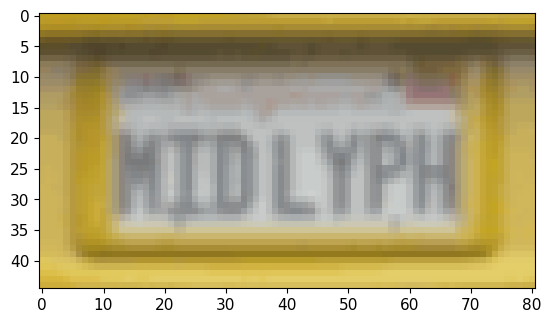

Easy OCR result is: [([[11, 15], [71, 15], [71, 35], [11, 35]], 'HIDLYPH', 0.40702879831865546)]
YOLO Model result is :         xmin       ymin       xmax       ymax  confidence  class name
5  11.943835  18.828102  20.464596  33.266670    0.926847     32    M
6  19.979359  18.855457  26.654242  33.390530    0.800512     34    I
1  27.226006  19.042425  35.595951  32.921574    0.955769      7    D
0  36.967808  18.696428  45.030457  33.129761    0.959469     17    L
3  45.309887  18.325218  52.422455  33.188530    0.941670     30    Y
2  53.004185  18.424446  60.501606  33.132210    0.948775     28    P
4  60.910130  18.211737  68.052193  33.246517    0.937549     10    H
Trained OCR result is : MILYPH


In [52]:
#printing all results together
%matplotlib inline
for i in range(len(xyxy)):
    labels = car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])]
    plt.imshow(car_img2[int(xyxy["ymin"][i]):int(xyxy["ymax"][i]), int(xyxy["xmin"][i]):int(xyxy["xmax"][i])])
    plt.show()
    model_1 = img2txt.readtext(labels)
    print("Easy OCR result is:",model_1)
    model_ocr = model2(labels)
    char_model = model_ocr.pandas().xyxy[0]#here the order is not proper, hence we sort it using xmin values
    print("YOLO Model result is :", char_model.sort_values("xmin"))
    result = ocr_printed_image(labels,printed_processor,printed_model)
    print("Trained OCR result is :", result)